# LINEAR REGRESSION USING HOUSE PRICE PREDICTION DATASET

<b>PROBLEM STATEMENT</b>:

*Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.*

*With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.*

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

### DOWNLOAD THE DATA

In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

100%|████████████████████████████████████████| 199k/199k [00:00<00:00, 1.10MB/s]
100%|████████████████████████████████████████| 199k/199k [00:00<00:00, 1.09MB/s]


In [2]:
!ls

2.LinearRegression.ipynb
house-prices-advanced-regression-techniques.zip


In [3]:
# unzip the data
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
!ls

2.LinearRegression.ipynb
data_description.txt
house-prices-advanced-regression-techniques.zip
sample_submission.csv
test.csv
train.csv


### READ THE DATA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### DATA DESCRIPTION

<b>File descriptions</b>
1. train.csv - the training set
2. test.csv - the test set
3. data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
4. sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms


<b>Data fields</b>

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [8]:
df.shape

(1460, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### DATA CLEANING
Check for missing values

In [11]:
# find columns with missing values
mis_cols = df.columns[df.isna().any()].tolist()
mis_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
print("Missing values percentage in")
for item in mis_cols:
    print("{} is \n".format(item),(df[item].isnull().sum()/df.shape[0])*100)

Missing values percentage in
LotFrontage is 
 17.73972602739726
Alley is 
 93.76712328767123
MasVnrType is 
 0.547945205479452
MasVnrArea is 
 0.547945205479452
BsmtQual is 
 2.5342465753424657
BsmtCond is 
 2.5342465753424657
BsmtExposure is 
 2.6027397260273974
BsmtFinType1 is 
 2.5342465753424657
BsmtFinType2 is 
 2.6027397260273974
Electrical is 
 0.0684931506849315
FireplaceQu is 
 47.26027397260274
GarageType is 
 5.5479452054794525
GarageYrBlt is 
 5.5479452054794525
GarageFinish is 
 5.5479452054794525
GarageQual is 
 5.5479452054794525
GarageCond is 
 5.5479452054794525
PoolQC is 
 99.52054794520548
Fence is 
 80.75342465753424
MiscFeature is 
 96.30136986301369


We can see that columns "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature" have lot of missing values and it's not wise to fill NaN values with any statistical methods. Hence, we'll drop those columns as it doesn't contain any substantial information.

In [13]:
df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

In [14]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
mis_cols = df.columns[df.isna().any()].tolist()
mis_cols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

Let's impute the missing values

In [16]:
#LotFrontage
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [17]:
#MasVnrType
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [18]:
#MasVnrArea
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [19]:
#BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [20]:
#Electrical
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [21]:
#GarageType,GarageFinish,GarageQual,GarageCond
for col in ('GarageType', 'GarageFinish','GarageYrBlt', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [22]:
df['GarageYrBlt'].head()

0    2003
1    1976
2    2001
3    1998
4    2000
Name: GarageYrBlt, dtype: object

In [23]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

### EDA

Let's analyze the target varibale

In [24]:
# Getting Description
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180921.20 and sigma = 79415.29



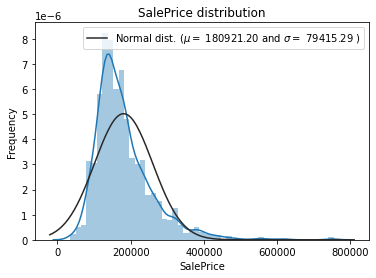

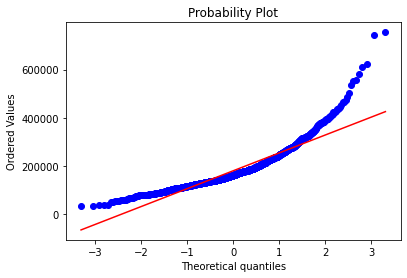

Skewness: 1.882876
Kurtosis: 6.536282


In [25]:
# Plot Histogram
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

### Multivariate Analysis

In [26]:
# Checking Categorical Data
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
# Checking Numerical Data
df.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [28]:
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  39 categorical + 37 numerical = 76 features


Let's use Correlation Matrix to extract the useful features to help with our prediction model

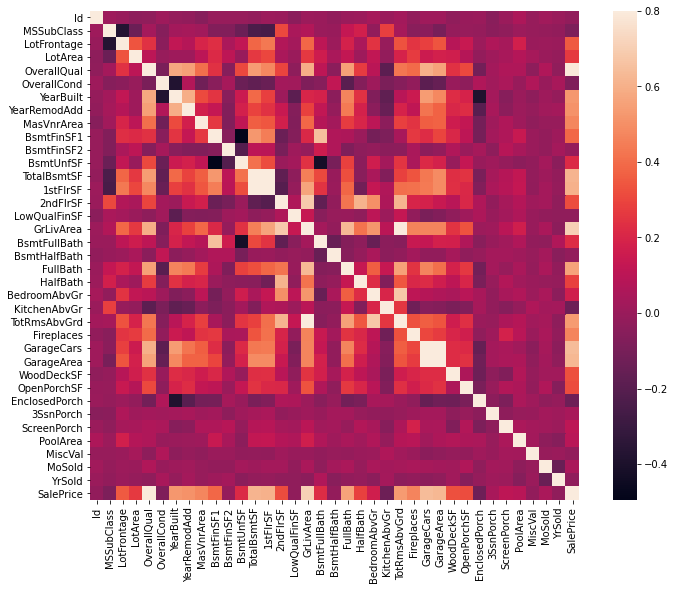

In [29]:
# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

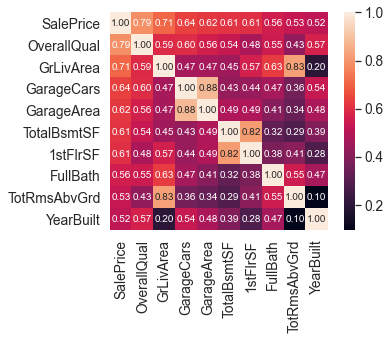

In [30]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [31]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


Ofcourse most correlated feature of SalePrice is SalePrice. Let's visualize the rest.

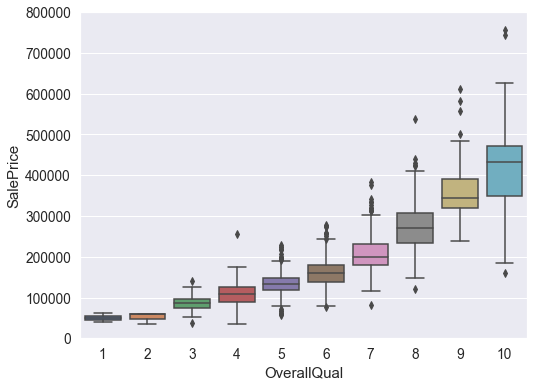

In [32]:
# Overall Quality vs Sale Price
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Better quality houses fetch better prices.

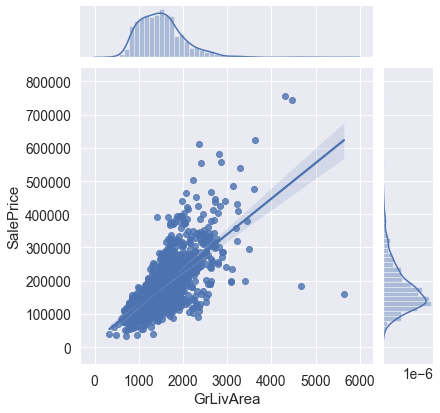

In [33]:
# Living Area vs Sale Price
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')

We shall remove the outliers

In [34]:
# Removing outliers
df = df.drop(df[(df['GrLivArea']>4000) 
                         & (df['SalePrice']<300000)].index).reset_index(drop=True)

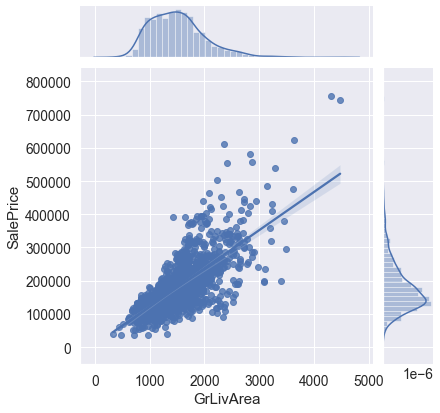

In [35]:
# Living Area vs Sale Price
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')

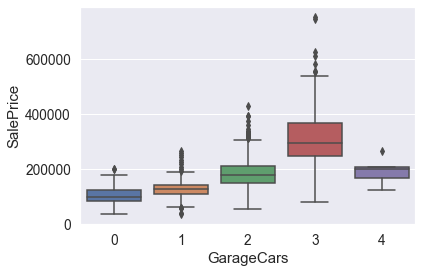

In [36]:
# Garage Area vs Sale Price
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

4-car garages result in less Sale Price? That doesn't make much sense. Let's remove those outliers.

In [37]:
# Removing outliers 
df = df.drop(df[(df['GarageCars']>3) 
                         & (df['SalePrice']<300000)].index).reset_index(drop=True)

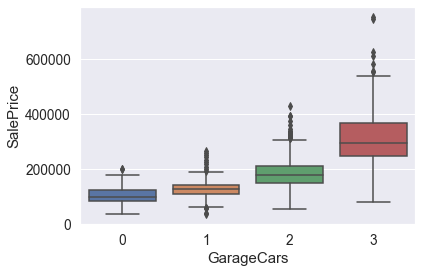

In [38]:
# Garage Area vs Sale Price
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

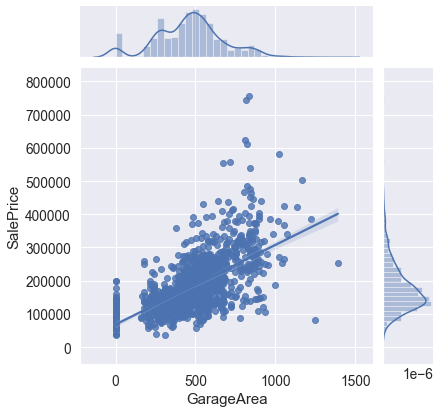

In [39]:
# Garage Area vs Sale Price
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

Again with the bottom two data-points. Let's remove those outliers.

In [40]:
# Removing outliers manually (More than 1000 sqft, less than $300k)
df = df.drop(df[(df['GarageArea']>1000) 
                         & (df['SalePrice']<300000)].index).reset_index(drop=True)

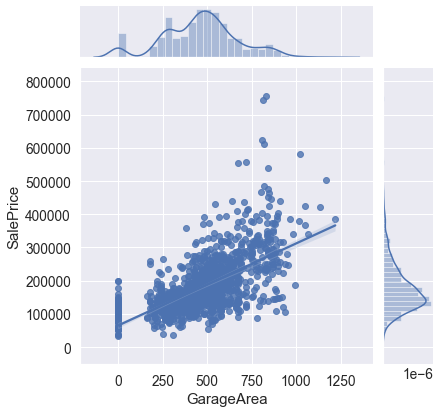

In [41]:
# Garage Area vs Sale Price
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

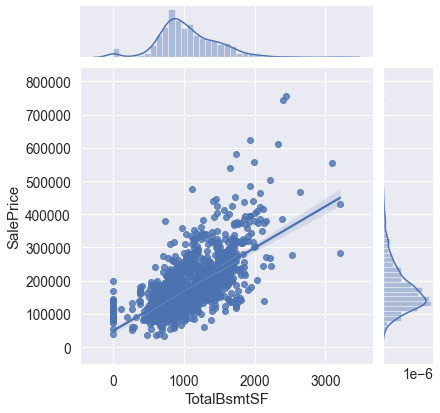

In [42]:
# Basement Area vs Sale Price
sns.jointplot(x=df['TotalBsmtSF'], y=df['SalePrice'], kind='reg')

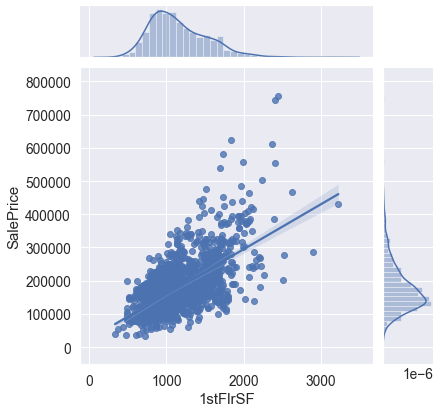

In [43]:
# First Floor Area vs Sale Price
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice'], kind='reg')

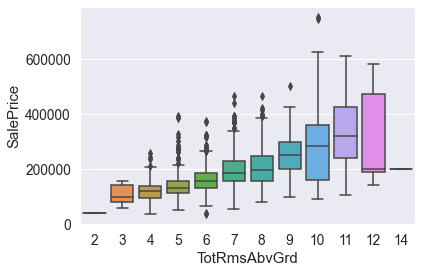

In [44]:
# Total Rooms vs Sale Price
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'])

 Houses with more than 11 room seems like an outlier due to lesser price than 11 room house. Let's fix that.

In [45]:
# Removing outliers 
df = df.drop(df[(df['TotRmsAbvGrd']>11)].index).reset_index(drop=True)

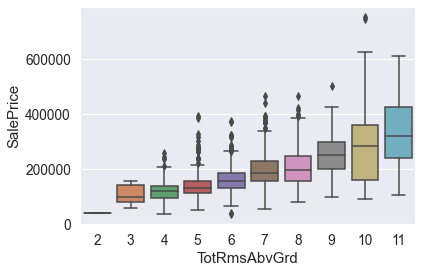

In [46]:
# Total Rooms vs Sale Price
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'])

### FEATURE ENGINEERING

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 76 columns):
Id               1438 non-null int64
MSSubClass       1438 non-null int64
MSZoning         1438 non-null object
LotFrontage      1438 non-null float64
LotArea          1438 non-null int64
Street           1438 non-null object
LotShape         1438 non-null object
LandContour      1438 non-null object
Utilities        1438 non-null object
LotConfig        1438 non-null object
LandSlope        1438 non-null object
Neighborhood     1438 non-null object
Condition1       1438 non-null object
Condition2       1438 non-null object
BldgType         1438 non-null object
HouseStyle       1438 non-null object
OverallQual      1438 non-null int64
OverallCond      1438 non-null int64
YearBuilt        1438 non-null int64
YearRemodAdd     1438 non-null int64
RoofStyle        1438 non-null object
RoofMatl         1438 non-null object
Exterior1st      1438 non-null object
Exterior2nd      1438 non

In [48]:
#MSSubClass =The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

Let's do LabelEncoding for categorical variables

In [49]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# Check shape        
print('Shape all_data: {}'.format(df.shape))


Shape all_data: (1438, 76)


In [50]:
# Adding Total Square Feet feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [51]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,9,RL,65.0,8450,1,3,Lvl,AllPub,Inside,...,0,0,0,0,4,2,WD,Normal,208500,2566
1,2,4,RL,80.0,9600,1,3,Lvl,AllPub,FR2,...,0,0,0,0,7,1,WD,Normal,181500,2524
2,3,9,RL,68.0,11250,1,0,Lvl,AllPub,Inside,...,0,0,0,0,11,2,WD,Normal,223500,2706
3,4,10,RL,60.0,9550,1,0,Lvl,AllPub,Corner,...,0,0,0,0,4,0,WD,Abnorml,140000,2473
4,5,9,RL,84.0,14260,1,0,Lvl,AllPub,FR2,...,0,0,0,0,3,2,WD,Normal,250000,3343



 mu = 12.02 and sigma = 0.40



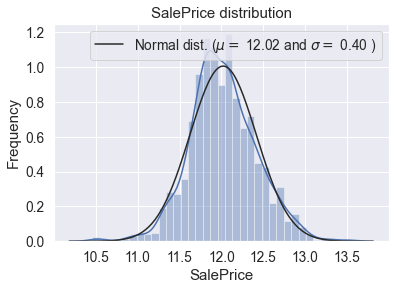

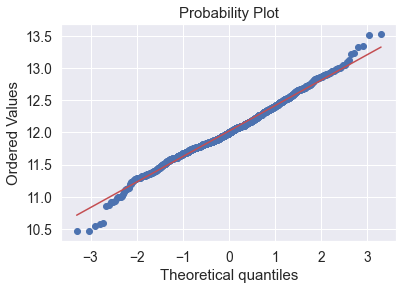

Skewness: 0.102676
Kurtosis: 0.790010


In [52]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

y_train = df.SalePrice.values

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

In [53]:
from scipy.stats import skew

numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
MiscVal,29.601711
PoolArea,17.317532
LotArea,12.809535
3SsnPorch,10.213800
LowQualFinSF,10.034758


In [54]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)
    df[feat] += 1

There are 56 skewed numerical features to Box Cox transform


In [55]:
df = pd.get_dummies(df)
print(df.shape)

(1438, 311)


### MODEL BUILDING

In [56]:
#Let's drop ID
df.drop("Id", axis=1, inplace=True)

Let's split SalePrice from the dataframe as we have to predict that

In [58]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [59]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [60]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [61]:
predictions = lm.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE: 16977666.266394697


We shall consider lesser columns and see how it performs.

Let's consider only the top 10 features we established before.

In [63]:
train = df[most_corr['Most Correlated Features']]

In [64]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [65]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [66]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [67]:
predictions = lm.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE: 0.01823439885815228


As you can see, LinearRegression Model performs poorly for higher dimension data. We can use Ensemble learning methods to tackle this problem which you'll see in the next notebook.